Question 5

5x5 Normalized Gaussian Kernel (sigma=2):
[[0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.03832756 0.05576627 0.06319146 0.05576627 0.03832756]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]]


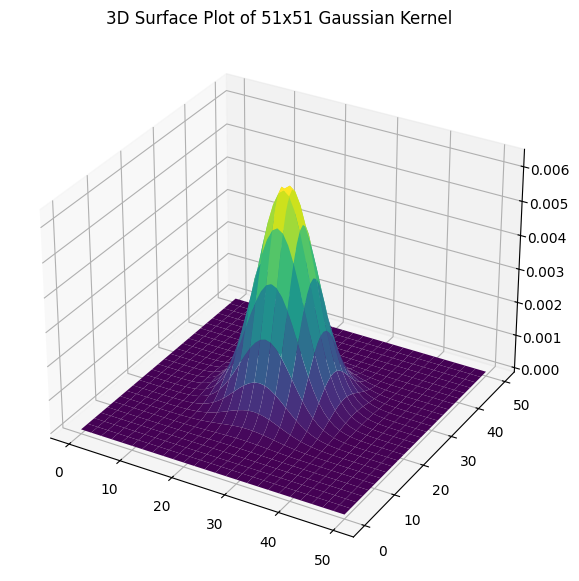

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

def gaussian_kernel(size, sigma):
    
    ax = np.linspace(-(size // 2), size // 2, size)
    gauss = np.exp(-0.5 * (ax / sigma)**2)
    kernel = np.outer(gauss, gauss)
    return kernel / kernel.sum()

#(a)
kernel_5x5 = gaussian_kernel(5, 2)
print("5x5 Normalized Gaussian Kernel (sigma=2):")
print(kernel_5x5)

#(b)
kernel_51x51 = gaussian_kernel(51, 5) 
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(np.arange(51), np.arange(51))
ax.plot_surface(x, y, kernel_51x51, cmap='viridis')
ax.set_title("3D Surface Plot of 51x51 Gaussian Kernel")
plt.show()


img = cv2.imread('runway.png', cv2.IMREAD_GRAYSCALE)


# (c) 
    
img_manual = convolve(img.astype(float), kernel_5x5)
img_manual = np.clip(img_manual, 0, 255).astype(np.uint8)

# (d)
img_opencv_GaussianBlur = cv2.GaussianBlur(img, (5, 5), sigmaX=2)

    
cv2.imshow('Original Grayscale', img)
cv2.imshow('Manual Smoothing (c)', img_manual)
cv2.imshow('OpenCV GaussianBlur (d)', img_opencv_GaussianBlur)
cv2.waitKey(0)
cv2.destroyAllWindows()